# <CENTER>WINE QUALITY PREDICTION

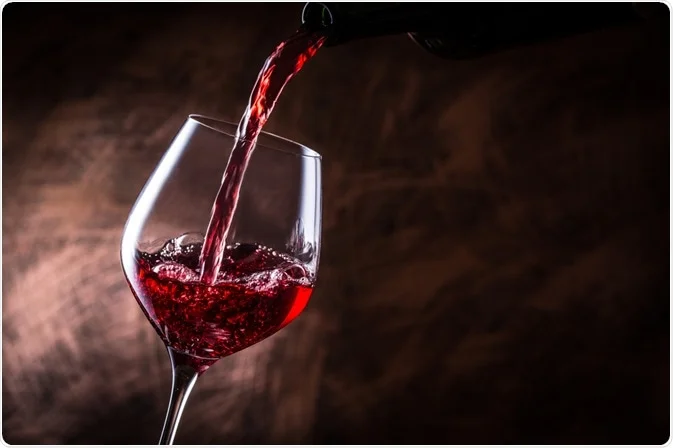

### This dataset is related to red variants of the Portuguese "Vinho Verde" wine.



## Description of attributes:
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable : 12 - quality (score between 3 and 8)





# <CENTER> IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,auc,accuracy_score,confusion_matrix,precision_score
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from itertools import cycle

In [4]:
data=pd.read_csv("winequality-red.csv")
data.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1350            9.0             0.600         0.29             2.0      0.069   
665             9.4             0.590         0.14             2.0      0.084   
701             7.0             0.650         0.02             2.1      0.066   
668            10.0             0.730         0.43             2.3      0.059   
13              7.8             0.610         0.29             1.6      0.114   
253             7.7             0.775         0.42             1.9      0.092   
492             8.9             0.400         0.51             2.6      0.052   
1526            6.8             0.470         0.08             2.2      0.064   
812            10.8             0.450         0.33             2.5      0.099   
314             7.4             0.360         0.29             2.6      0.087   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1350                 32.0                  73.0  0.99654  3.34       0.57   
665                  25.0                  48.0  0.99810  3.14       0.56   
701                   8.0                  25.0  0.99720  3.47       0.67   
668                  15.0                  31.0  0.99660  3.15       0.57   
13                    9.0                  29.0  0.99740  3.26       1.56   
253                   8.0                  86.0  0.99590  3.23       0.59   
492                  13.0                  27.0  0.99500  3.32       0.90   
1526                 18.0                  38.0  0.99553  3.30       0.65   
812                  20.0                  38.0  0.99818  3.24       0.71   
314                  26.0                  72.0  0.99645  3.39       0.68   

      alcohol  quality  
1350     10.0        5  
665       9.7        5  
701       9.5        6  
668      11.0        5  
13        9.1        5  
253       9.5        5  
492      13.4        7  
1526      9.6        6  
812      10.8        5  
314      11.0        5

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.shape

(1599, 12)

In [7]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.duplicated().sum()

240

In [10]:
data.drop_duplicates(inplace=True)

# <center>UNIVARIATE ANALYSIS

## HISTOGRAM

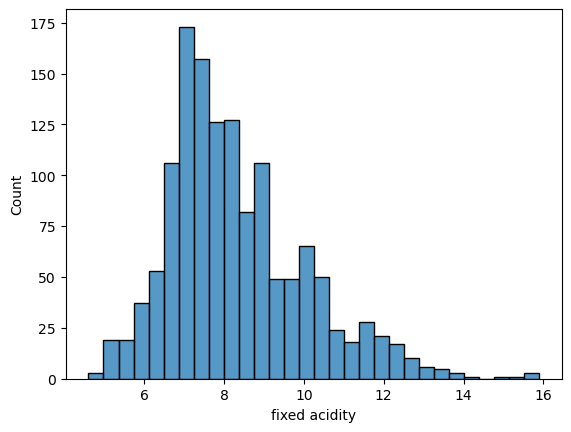

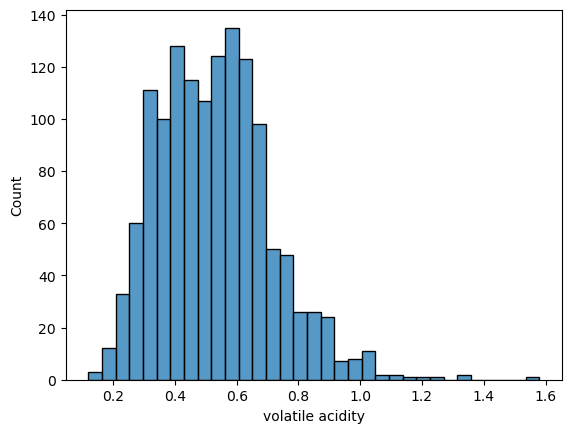

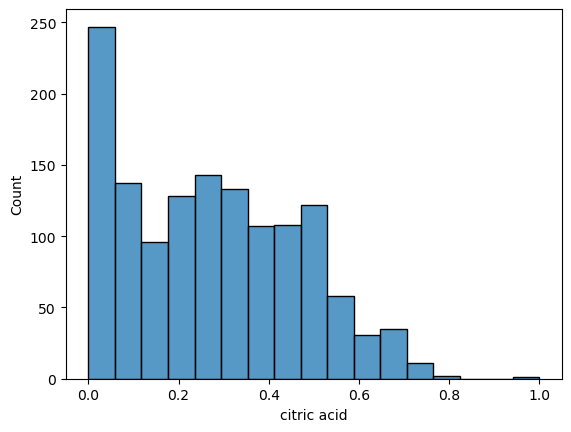

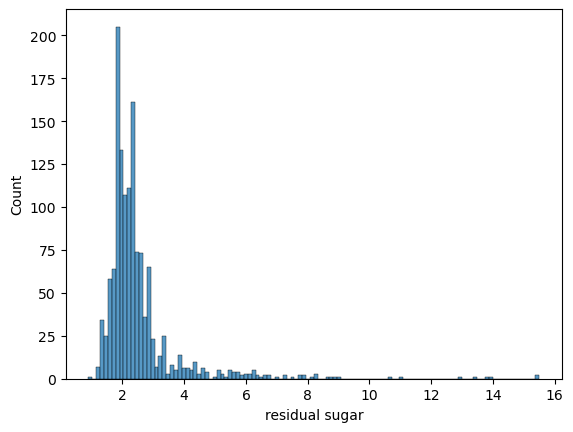

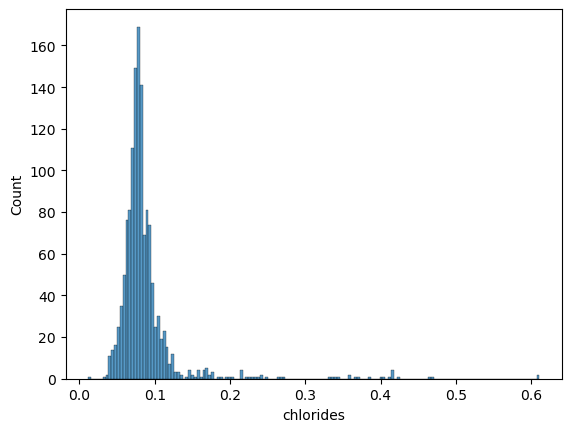

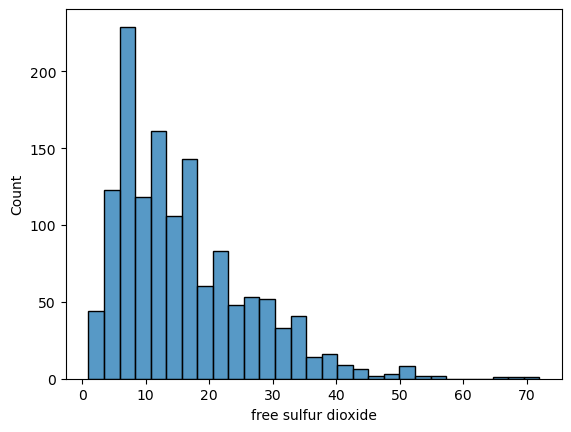

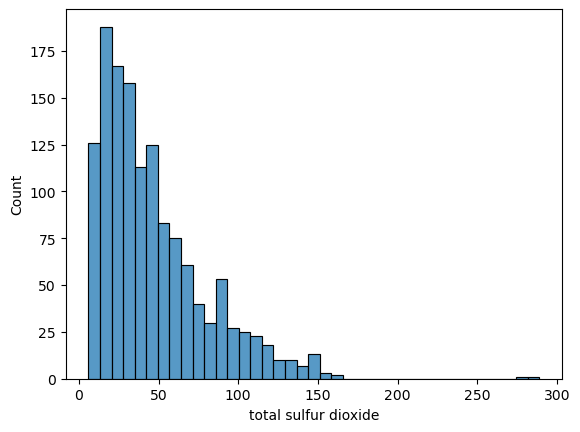

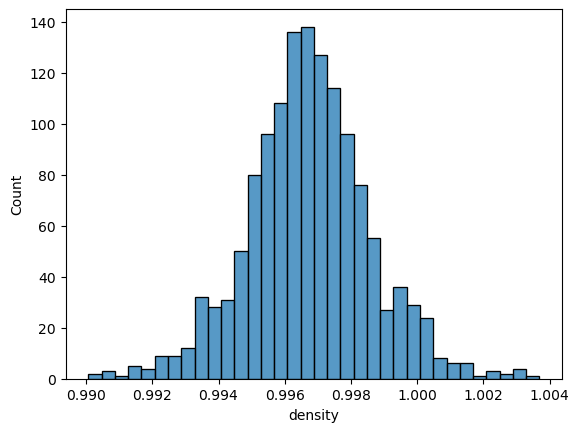

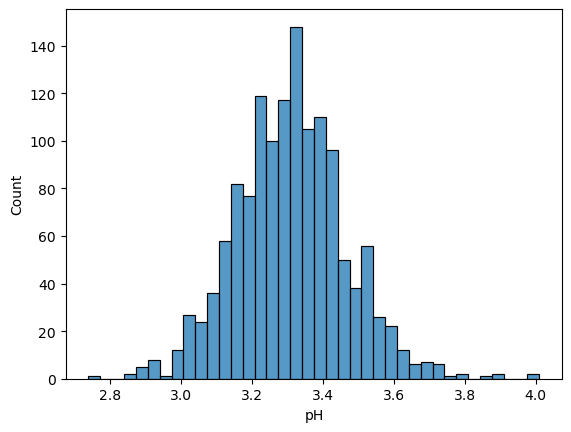

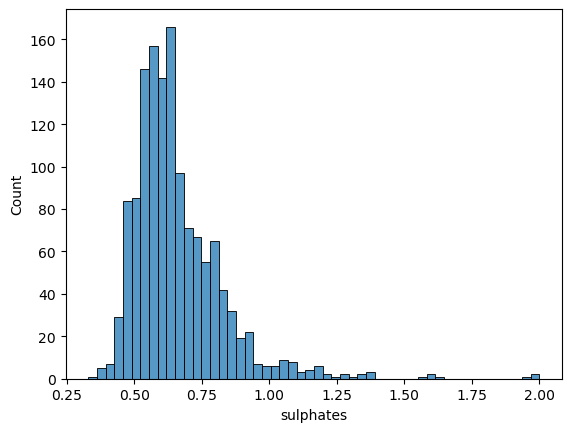

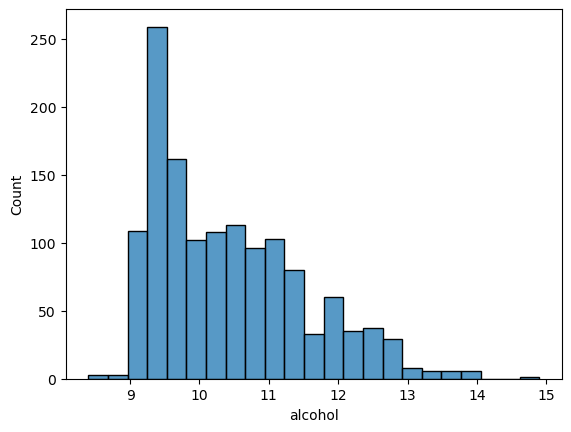

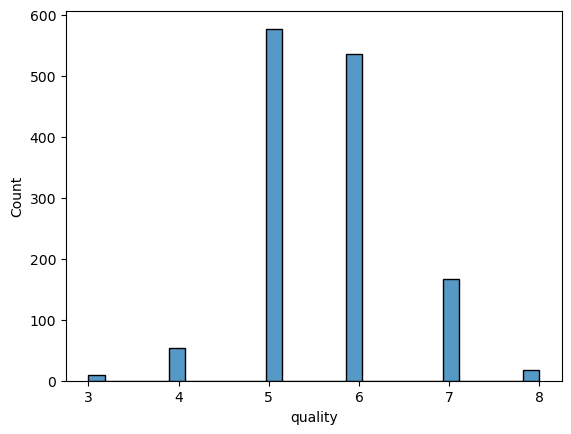

In [11]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.histplot(x=data[i])
        plt.show()

## KDE PLOT

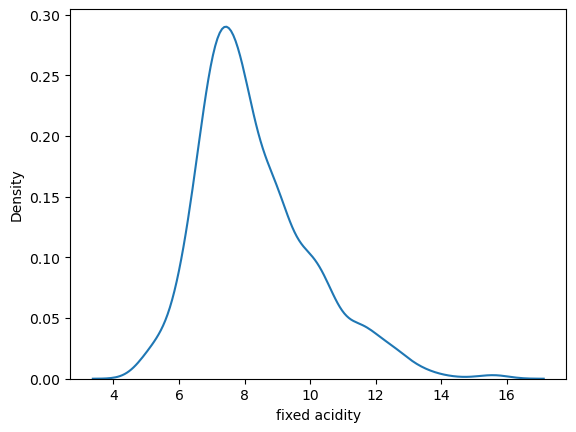

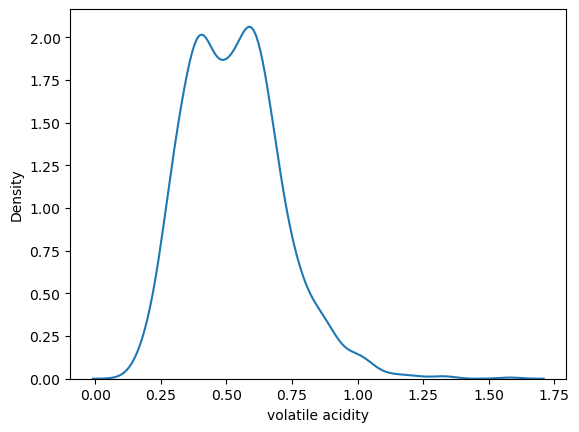

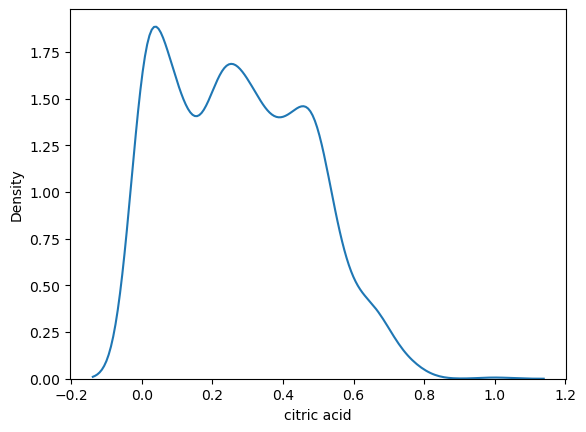

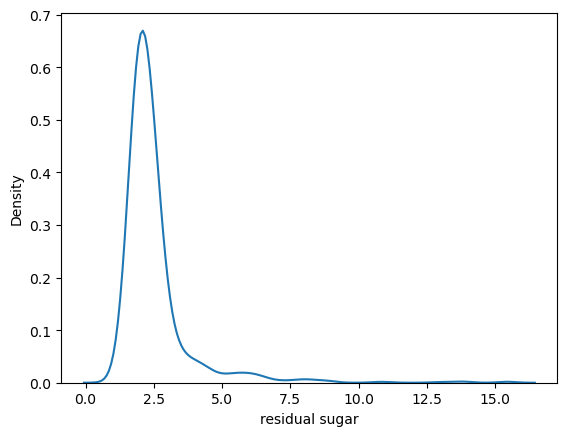

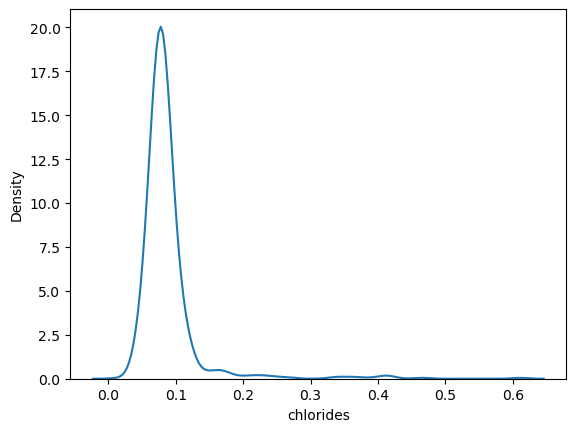

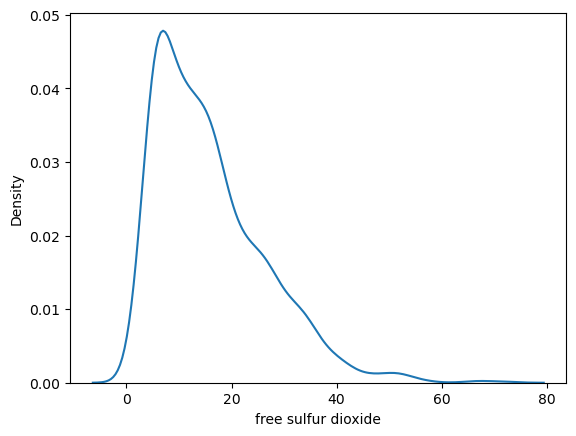

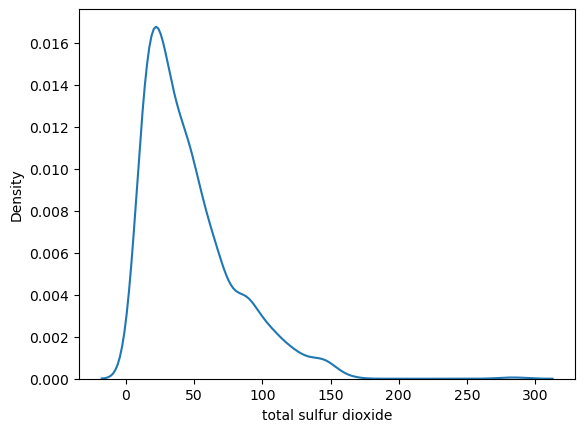

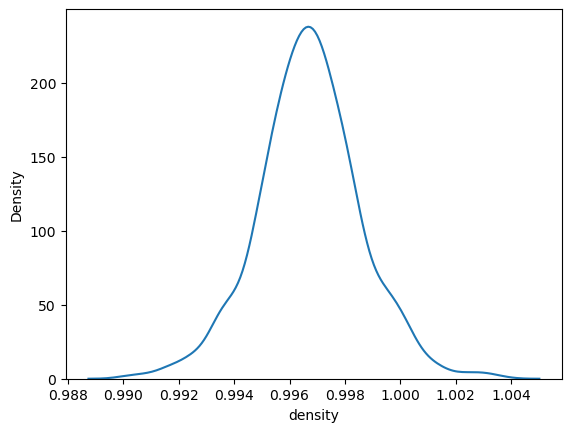

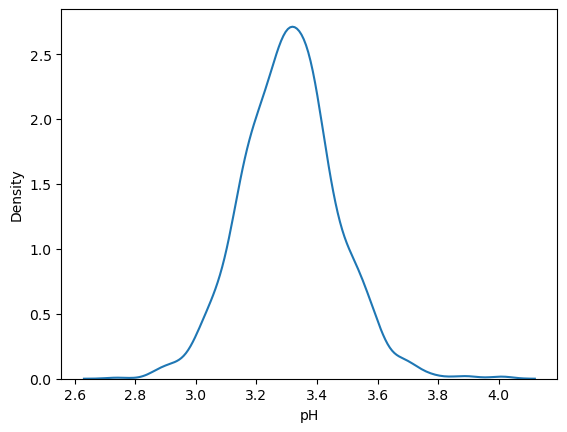

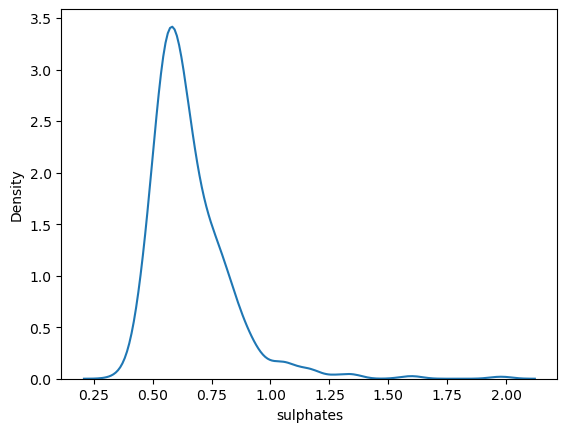

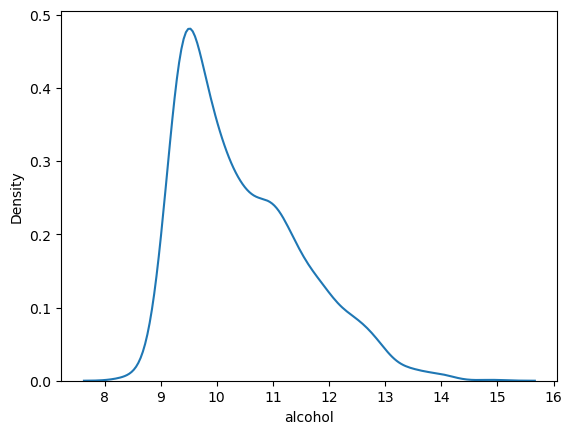

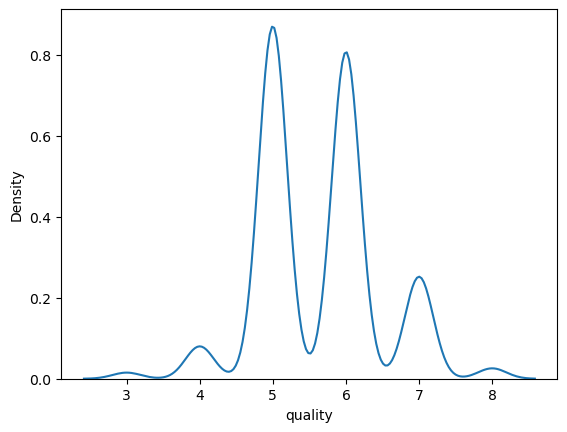

In [12]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i])
        plt.show()

## BOXPLOT

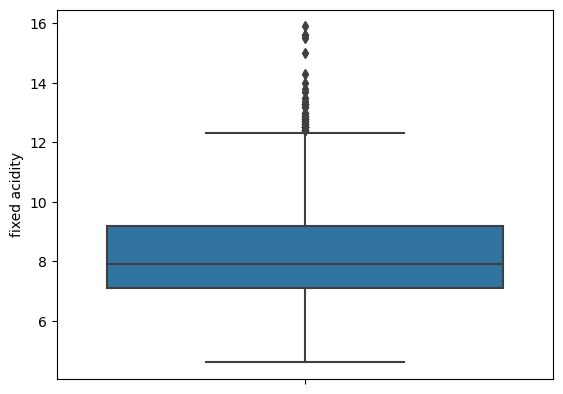

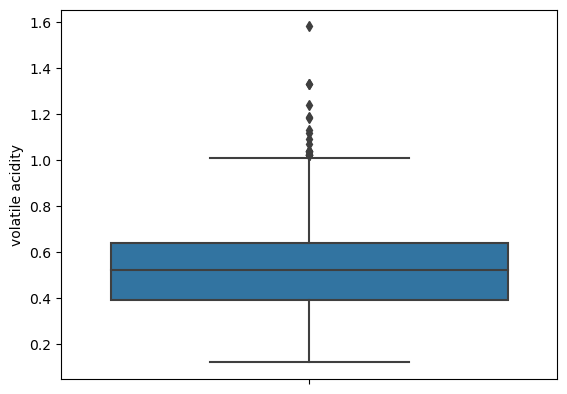

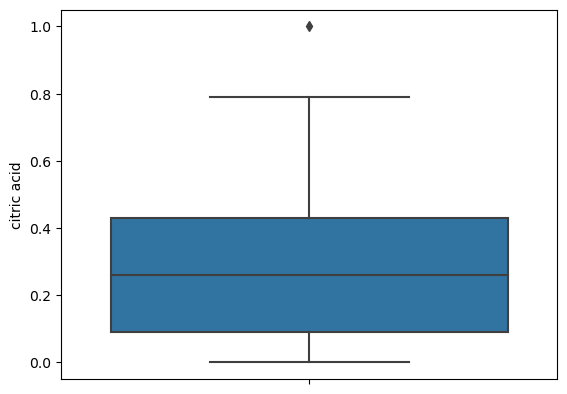

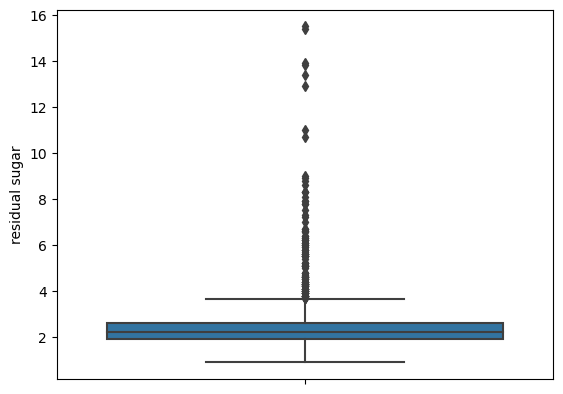

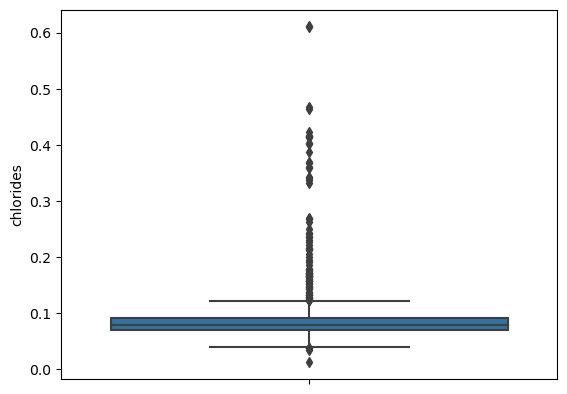

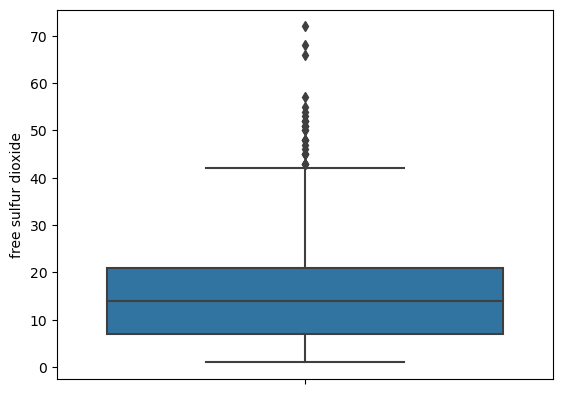

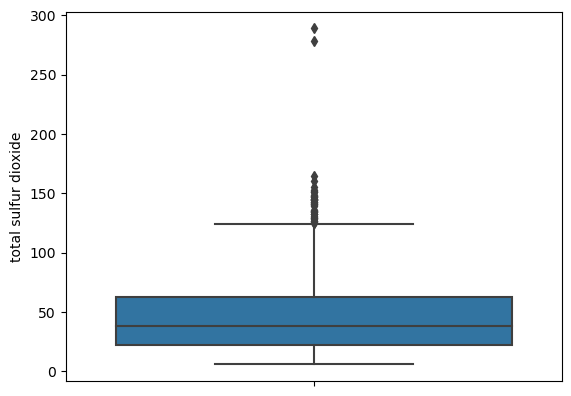

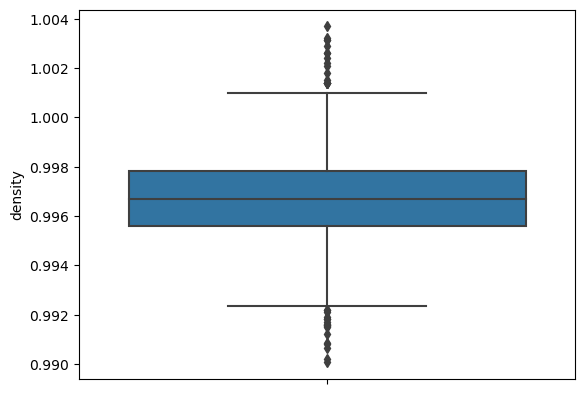

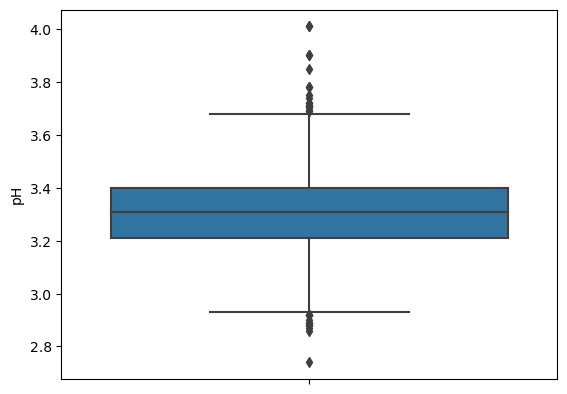

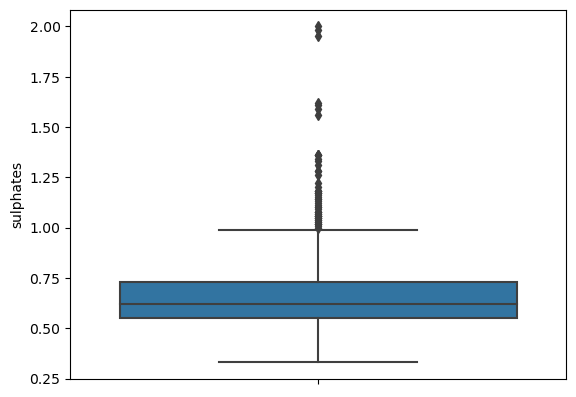

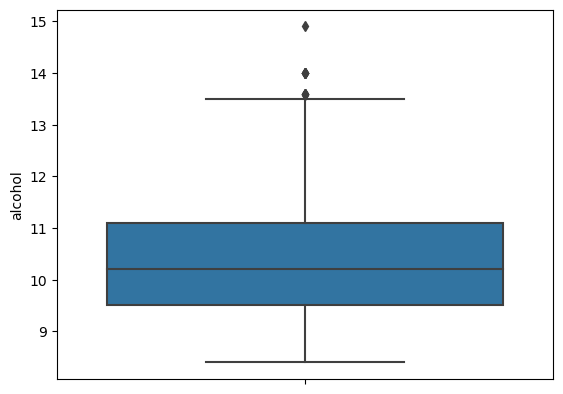

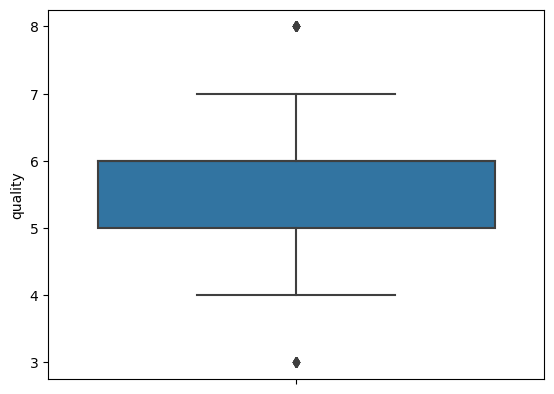

In [13]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

# <center> MULTIVARIATE ANALYSIS

## PIE CHART

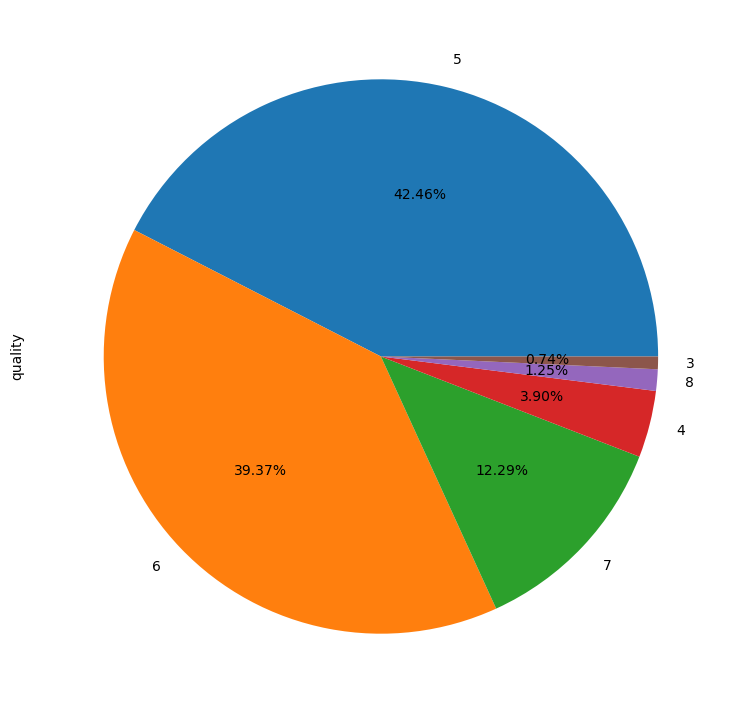

In [14]:
plt.figure(figsize=(9,9))
data.quality.value_counts().plot.pie(autopct = '%1.2f%%');

## BARPLOT

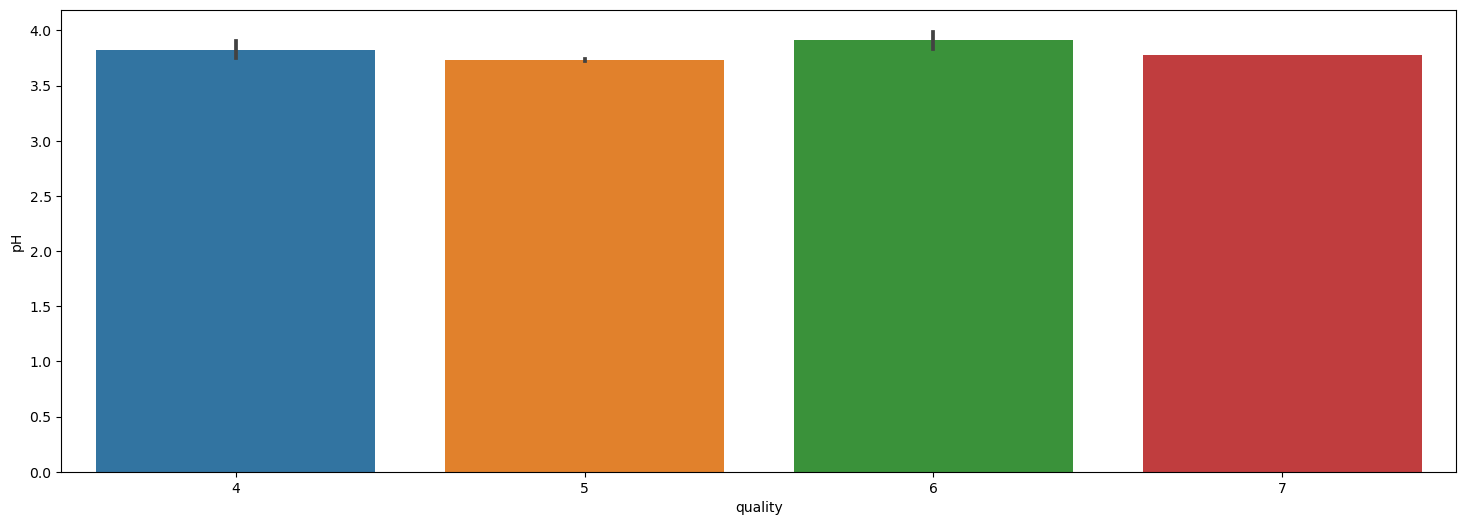

In [15]:
plt.figure(figsize=(18, 6))
sns.barplot(x='quality', y='pH', data=data.sort_values(by='pH', ascending=False)[:10]);

## PAIRPLOT

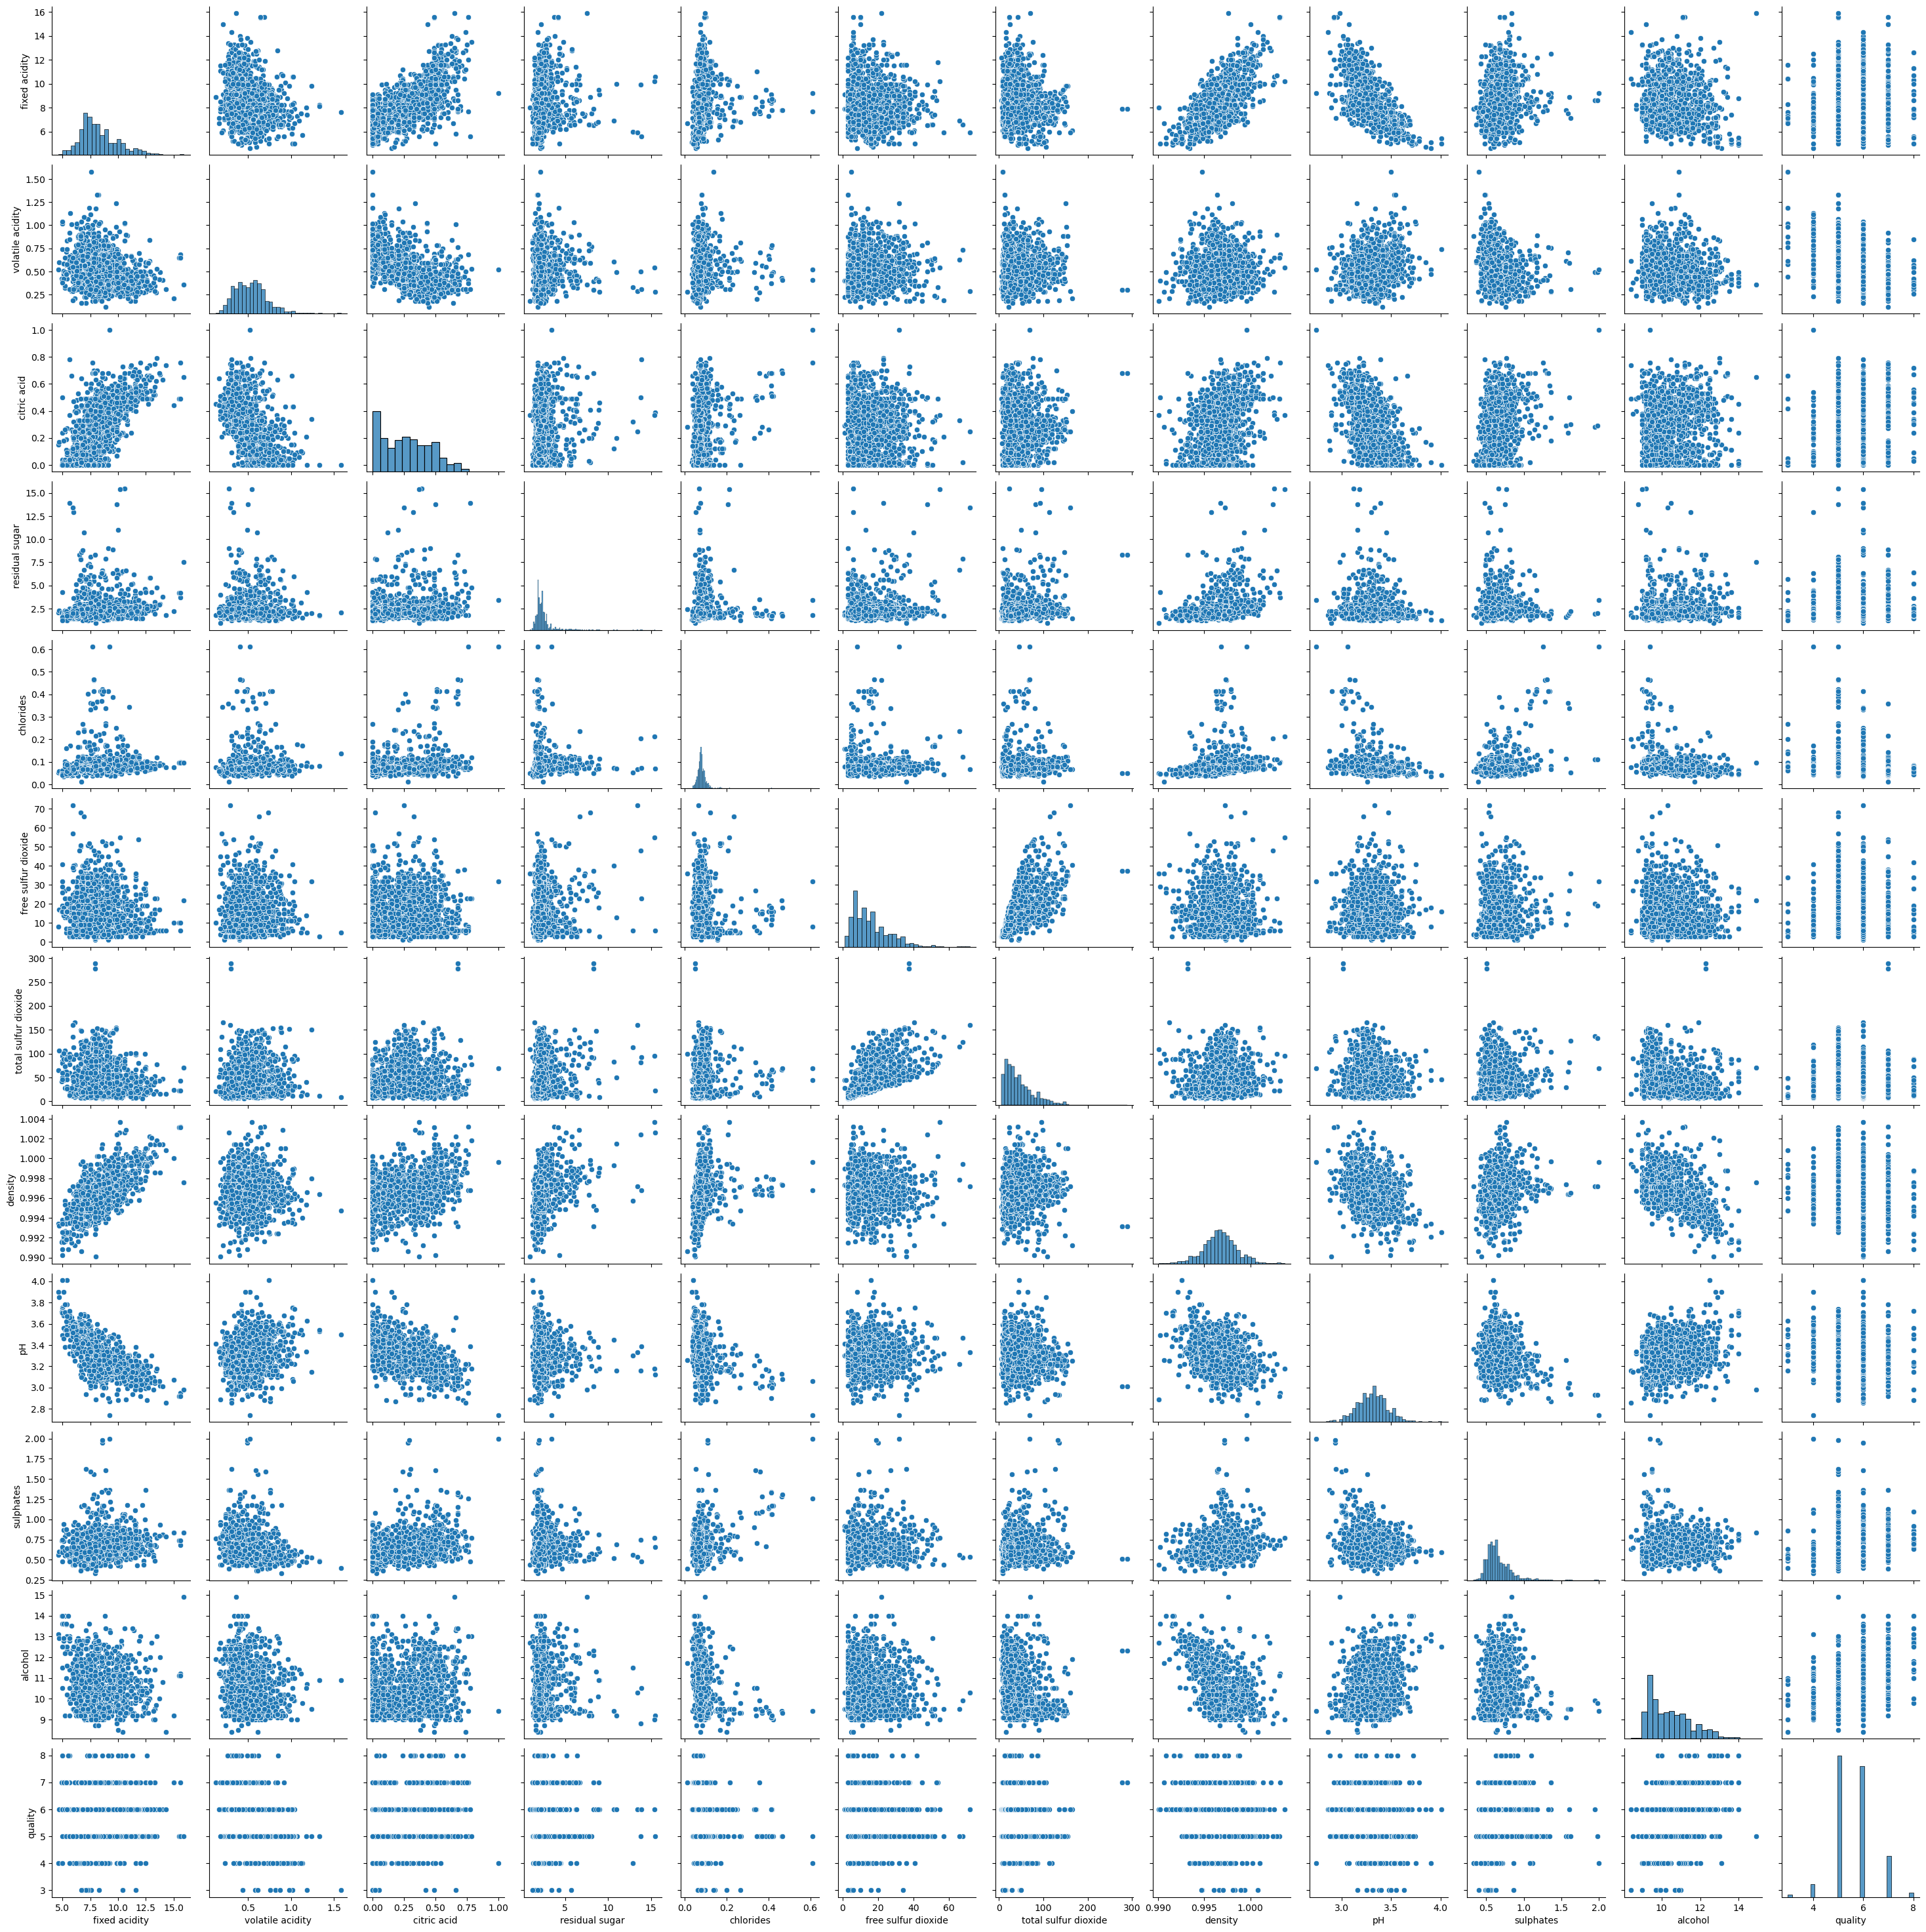

In [14]:
sns.pairplot(data=data)
plt.show();

## LINEPLOT

<AxesSubplot:>

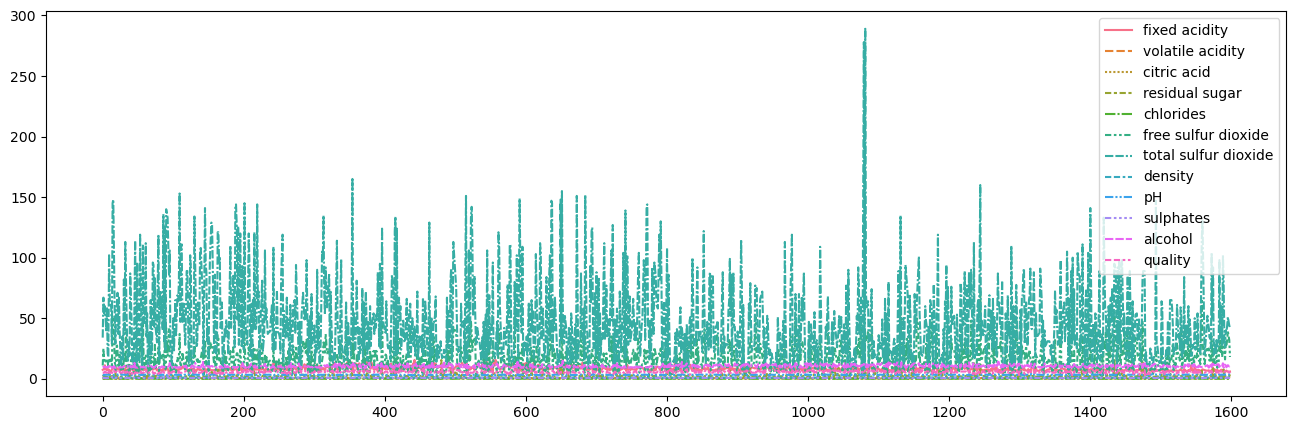

In [16]:
plt.figure(figsize=(16,5))
sns.lineplot(data=data)

<AxesSubplot:title={'center':'Quality of wine'}>

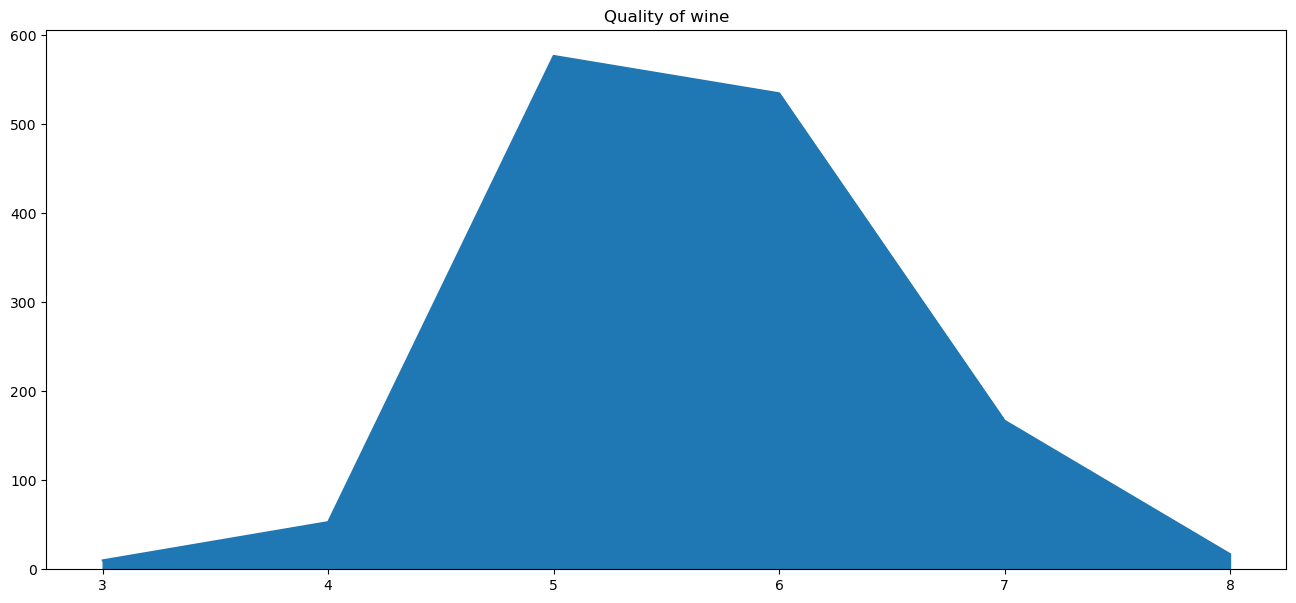

In [18]:
data['quality'].value_counts().sort_index().plot.area(
    figsize = (16,7),
    title = 'Quality of wine'
)

# <center>CHECKING CORRELATION USING HEATMAP

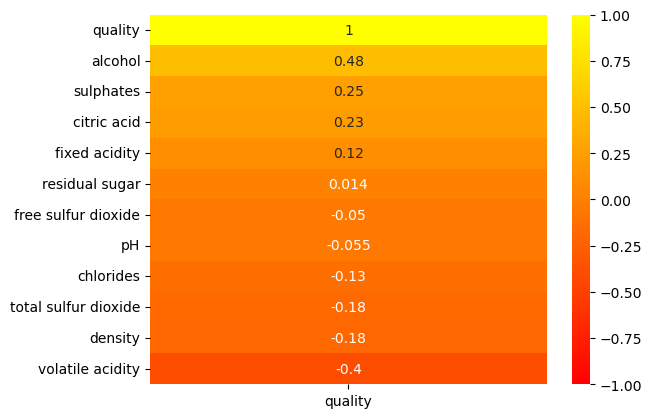

In [15]:
sns.heatmap(data.corr()[['quality']].sort_values(by='quality',ascending=False),vmax=1,vmin=-1,annot=True)

In [16]:
x=data.iloc[:,:-1].values


In [17]:
y=data.iloc[:,-1].values

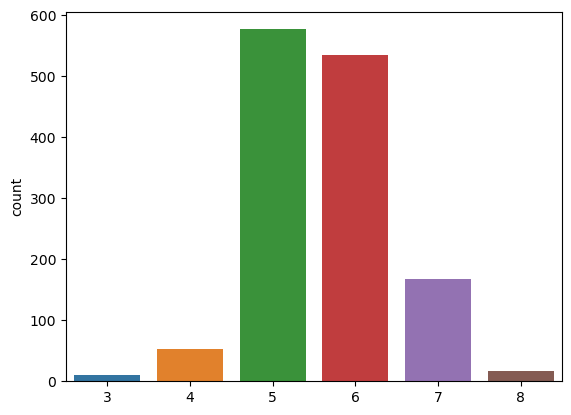

In [18]:
sns.countplot(x=y);

### We can see that the target data is not balanced.We may use over sampling to correct data

### Initialising the sampler

In [19]:
over_sampler=SMOTE()

In [20]:
x, y = over_sampler.fit_resample(x,y)

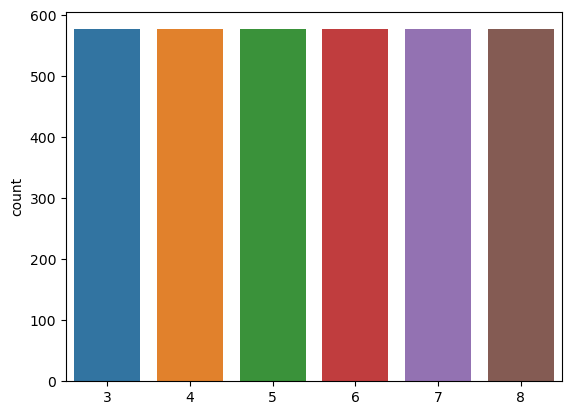

In [21]:
sns.countplot(x=y);

### We can see that now the data is balanced correctly

In [22]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## FEATURE SCALING

In [23]:
sc=StandardScaler()

In [24]:
x=sc.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
model=RandomForestClassifier()

In [27]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8181818181818182
confusion_matrix train is::  [[457   0   0   0   0   0]
 [  0 475   0   0   0   0]
 [  0   0 458   0   0   0]
 [  0   0   0 454   0   0]
 [  0   0   0   0 469   0]
 [  0   0   0   0   0 456]]
confusion_matrix test is::  [[120   0   0   0   0   0]
 [  2  95   4   1   0   0]
 [  1   9  76  28   5   0]
 [  0   5  31  56  25   6]
 [  0   0   1   4 100   3]
 [  0   0   0   0   1 120]]
Wrong Predictions made: 126 / 693
************************************************************


## PREDICTING Y

In [28]:
OUTPUT=pd.DataFrame(zip(y,model.predict(x)),columns=("ACTUAL","PREDICTION"),dtype=int)

In [29]:
OUTPUT.sample(15)

ACTUAL  PREDICTION
2648       7           7
625        5           5
2696       7           7
2394       4           4
2689       7           7
2340       4           4
1504       3           3
723        7           7
3094       8           8
2003       4           4
1560       3           3
523        5           5
1086       6           6
1139       5           5
955        6           6

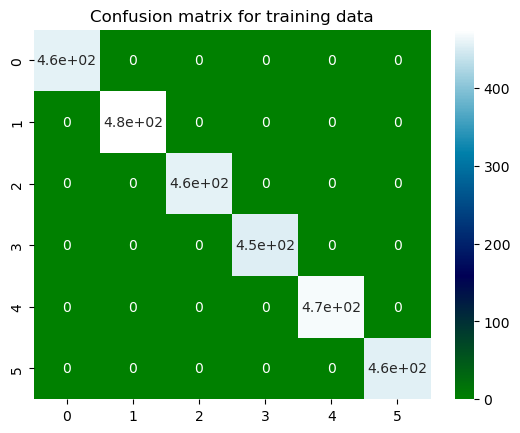

In [30]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train,annot=True,cmap='ocean');

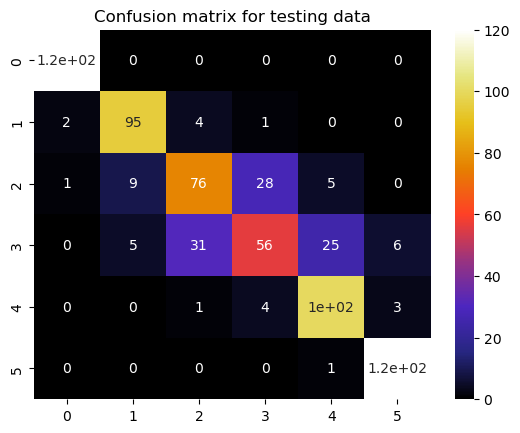

In [31]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

## We have to binarize the target

In [32]:
y = label_binarize(y, classes=[3,4,5,6,7,8])
n_classes = 6

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# <center> ALTERNATIVE METHOD

## USING RANDOMFOREST CLASSIFIER

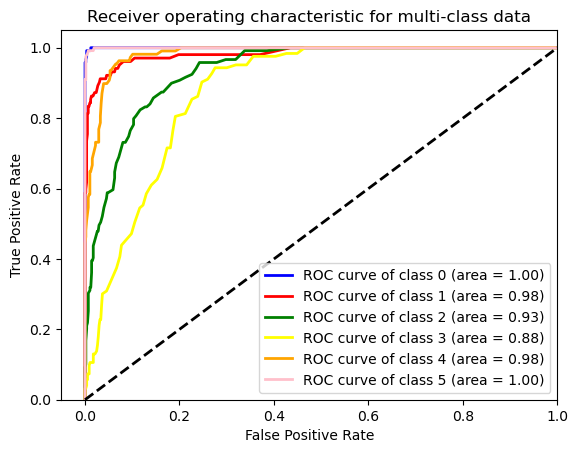

In [34]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()